In [1]:
### data and matrix handling
import pandas as pd
import numpy as np

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## scientific
import scipy

## utilities
import os

In [2]:
## loading the data
data_path = "x__data/"
math_path = os.path.join(data_path, "student_math_clean.csv")
portuguese_path = os.path.join(data_path, "student_portuguese_clean.csv")

math_df = pd.read_csv(math_path)
portuguese_df = pd.read_csv(portuguese_path)

## Looking at Data

### `Math` data

In [3]:
math_df.head()

student_id school sex  age address_type              family_size  \
0           1     GP   F   18        Urban           Greater than 3   
1           2     GP   F   17        Urban           Greater than 3   
2           3     GP   F   15        Urban  Less than or equal to 3   
3           4     GP   F   15        Urban           Greater than 3   
4           5     GP   F   16        Urban           Greater than 3   

     parent_status               mother_education  \
0            Apart               higher education   
1  Living together  primary education (4th grade)   
2  Living together  primary education (4th grade)   
3  Living together               higher education   
4  Living together            secondary education   

                father_education mother_job  ... family_relationship  \
0               higher education    at_home  ...                   4   
1  primary education (4th grade)    at_home  ...                   5   
2  primary education (4th grade)    at_home  ...                   4   
3               5th to 9th grade     health  ...                   3   
4            secondary education      other  ...                   4   

  free_time social weekday_alcohol weekend_alcohol  health absences grade_1  \
0         3      4               1               1       3        6       5   
1         3      3               1               1       3        4       5   
2         3      2               2               3       3       10       7   
3         2      2               1               1       5        2      15   
4         3      2               1               2       5        4       6   

  grade_2 final_grade  
0       6           6  
1       5           6  
2       8          10  
3      14          15  
4      10          10  

[5 rows x 34 columns]

In [4]:
print(f"There are {math_df.shape[0]} samples in the Math dataframe")

There are 395 samples in the Math dataframe


### `Portuguese` data

In [5]:
portuguese_df.head()

student_id school sex  age address_type              family_size  \
0           1     GP   F   18        Urban           Greater than 3   
1           2     GP   F   17        Urban           Greater than 3   
2           3     GP   F   15        Urban  Less than or equal to 3   
3           4     GP   F   15        Urban           Greater than 3   
4           5     GP   F   16        Urban           Greater than 3   

     parent_status               mother_education  \
0            Apart               higher education   
1  Living together  primary education (4th grade)   
2  Living together  primary education (4th grade)   
3  Living together               higher education   
4  Living together            secondary education   

                father_education mother_job  ... family_relationship  \
0               higher education    at_home  ...                   4   
1  primary education (4th grade)    at_home  ...                   5   
2  primary education (4th grade)    at_home  ...                   4   
3               5th to 9th grade     health  ...                   3   
4            secondary education      other  ...                   4   

  free_time social weekday_alcohol weekend_alcohol  health absences grade_1  \
0         3      4               1               1       3        4       0   
1         3      3               1               1       3        2       9   
2         3      2               2               3       3        6      12   
3         2      2               1               1       5        0      14   
4         3      2               1               2       5        0      11   

  grade_2 final_grade  
0      11          11  
1      11          11  
2      13          12  
3      14          14  
4      13          13  

[5 rows x 34 columns]

In [6]:
print(f"There are {portuguese_df.shape[0]} samples in the Portuguese dataframe")

There are 649 samples in the Portuguese dataframe


### Checking for differences in `math` and `portuguese` features

In [7]:
math_features = set(math_df.columns)
portuguese_features = set(portuguese_df.columns)

print(f"There are {len(math_features-portuguese_features)} number of feature differences")

There are 0 number of feature differences


# Exploratory Data Analysis

### Adding feature to differenciate `math intensive` subjects from `non-math-intensive`

In [8]:
new_feature_name = "math_intensive"
portuguese_df["math_intensive"] = "no"
math_df["math_intensive"] = "yes"

## Putting datasets together

In [9]:
student_df = pd.concat([portuguese_df, math_df], axis=0)

In [10]:
student_df.shape

(1044, 35)

## Checking datatypes out

In [12]:
student_df.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

### Removing Unnecessary Features
The school feature is unnecessary since it is not a feature under consideration

In [11]:
student_df.drop("school", axis=1, inplace=True)

## Checking for Missing

In [12]:
print(f"There are {student_df.isna().sum().sum()} missing values")

There are 0 missing values


## Dropping duplicate rows

In [13]:
student_df.drop_duplicates(inplace=True)

In [14]:
print(f"Number of rows after drop: {student_df.shape[0]}")

Number of rows after drop: 1044


## Separating into `categorical` and `numerical` features

In [15]:
cat_df = student_df.select_dtypes("object")
num_df = student_df.select_dtypes("number")

In [16]:
print(f"There are {cat_df.shape[1]} categorical features and {num_df.shape[1]} numerical features")

There are 21 categorical features and 13 numerical features


## Numerical Features

In [17]:
num_df.columns

Index(['student_id', 'age', 'class_failures', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')

### Dropping unnecessary columns

In [18]:
num_df = num_df.drop(["student_id"], axis=1)

In [19]:
num_df.columns

Index(['age', 'class_failures', 'family_relationship', 'free_time', 'social',
       'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_1',
       'grade_2', 'final_grade'],
      dtype='object')

### Numerical Data summary

In [20]:
num_df.describe()

age  class_failures  family_relationship    free_time  \
count  1044.000000     1044.000000          1044.000000  1044.000000   
mean     16.726054        0.264368             3.935824     3.201149   
std       1.239975        0.656142             0.933401     1.031507   
min      15.000000        0.000000             1.000000     1.000000   
25%      16.000000        0.000000             4.000000     3.000000   
50%      17.000000        0.000000             4.000000     3.000000   
75%      18.000000        0.000000             5.000000     4.000000   
max      22.000000        3.000000             5.000000     5.000000   

            social  weekday_alcohol  weekend_alcohol       health  \
count  1044.000000      1044.000000      1044.000000  1044.000000   
mean      3.156130         1.494253         2.284483     3.543103   
std       1.152575         0.911714         1.285105     1.424703   
min       1.000000         1.000000         1.000000     1.000000   
25%       2.000000         1.000000         1.000000     3.000000   
50%       3.000000         1.000000         2.000000     4.000000   
75%       4.000000         2.000000         3.000000     5.000000   
max       5.000000         5.000000         5.000000     5.000000   

          absences      grade_1      grade_2  final_grade  
count  1044.000000  1044.000000  1044.000000  1044.000000  
mean      4.434866    11.213602    11.246169    11.341954  
std       6.210017     2.983394     3.285071     3.864796  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     9.000000     9.000000    10.000000  
50%       2.000000    11.000000    11.000000    11.000000  
75%       6.000000    13.000000    13.000000    14.000000  
max      75.000000    19.000000    19.000000    20.000000

### Feature Distributions

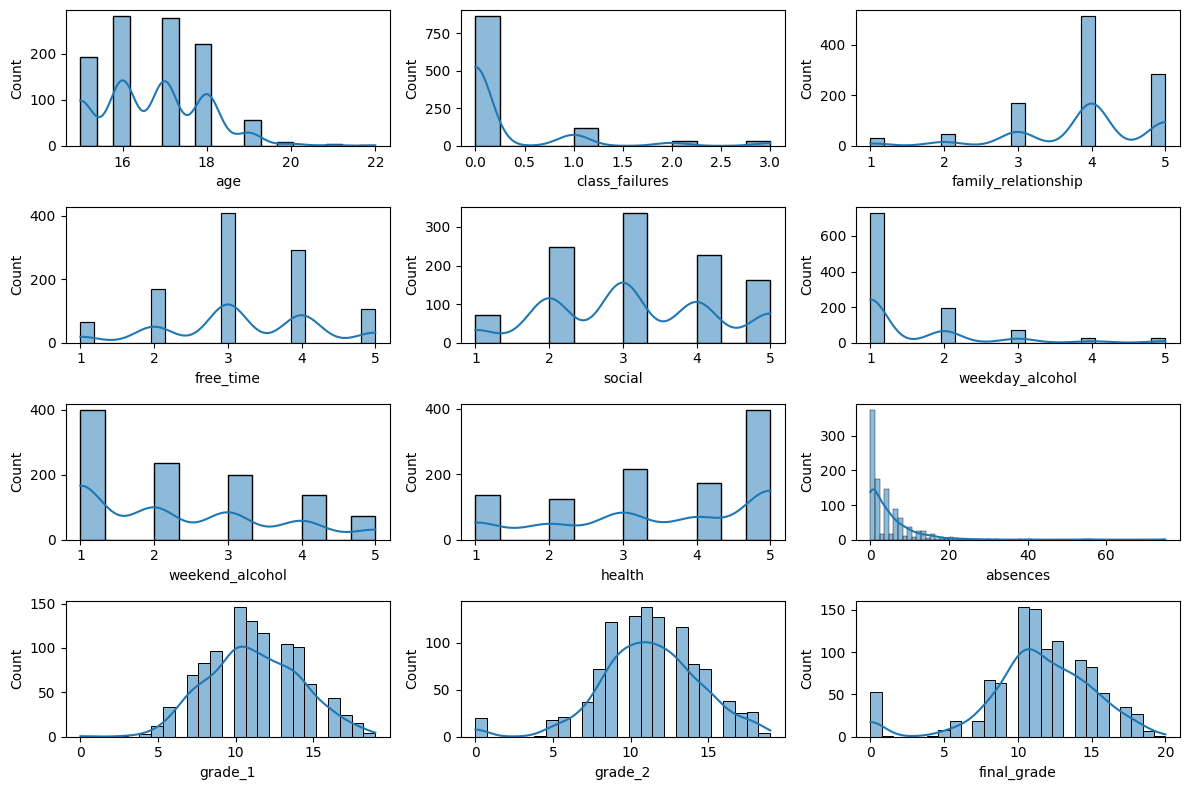

In [21]:
# student_df["age"].hist()
# sns.displot(student_df,  kind="kde")
fig, axes = plt.subplots(4,3, figsize=(12, 8))

for ax,col in zip(axes.flatten(), num_df.columns):
    sns.histplot(num_df[col], ax=ax, kde=True)

plt.tight_layout()
plt.show()

### Checking Correlations

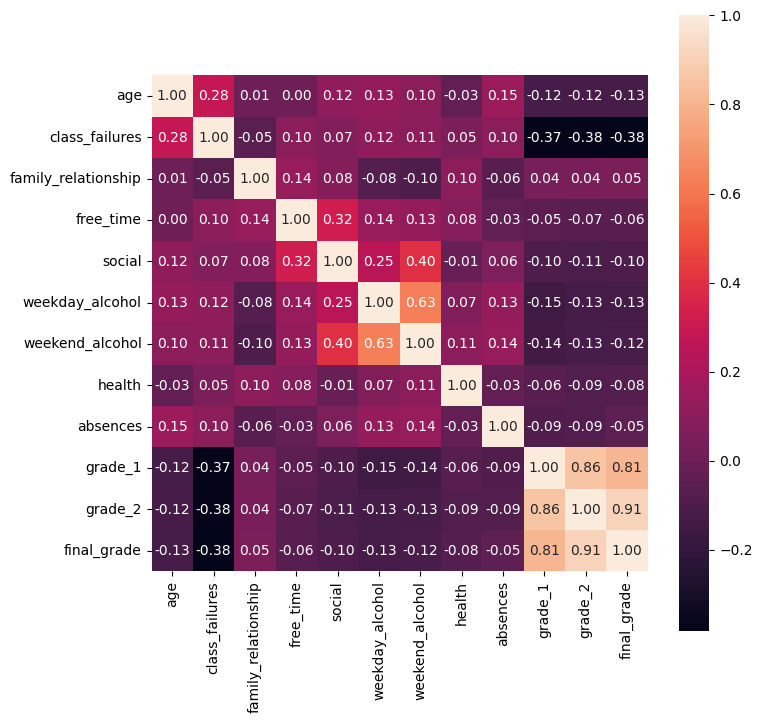

In [22]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(), square=True, annot=True, fmt=".2f")
plt.show()

### Pairplots
This is necessary to see the relationship between variables; whether `linear`, `quadratic` etc

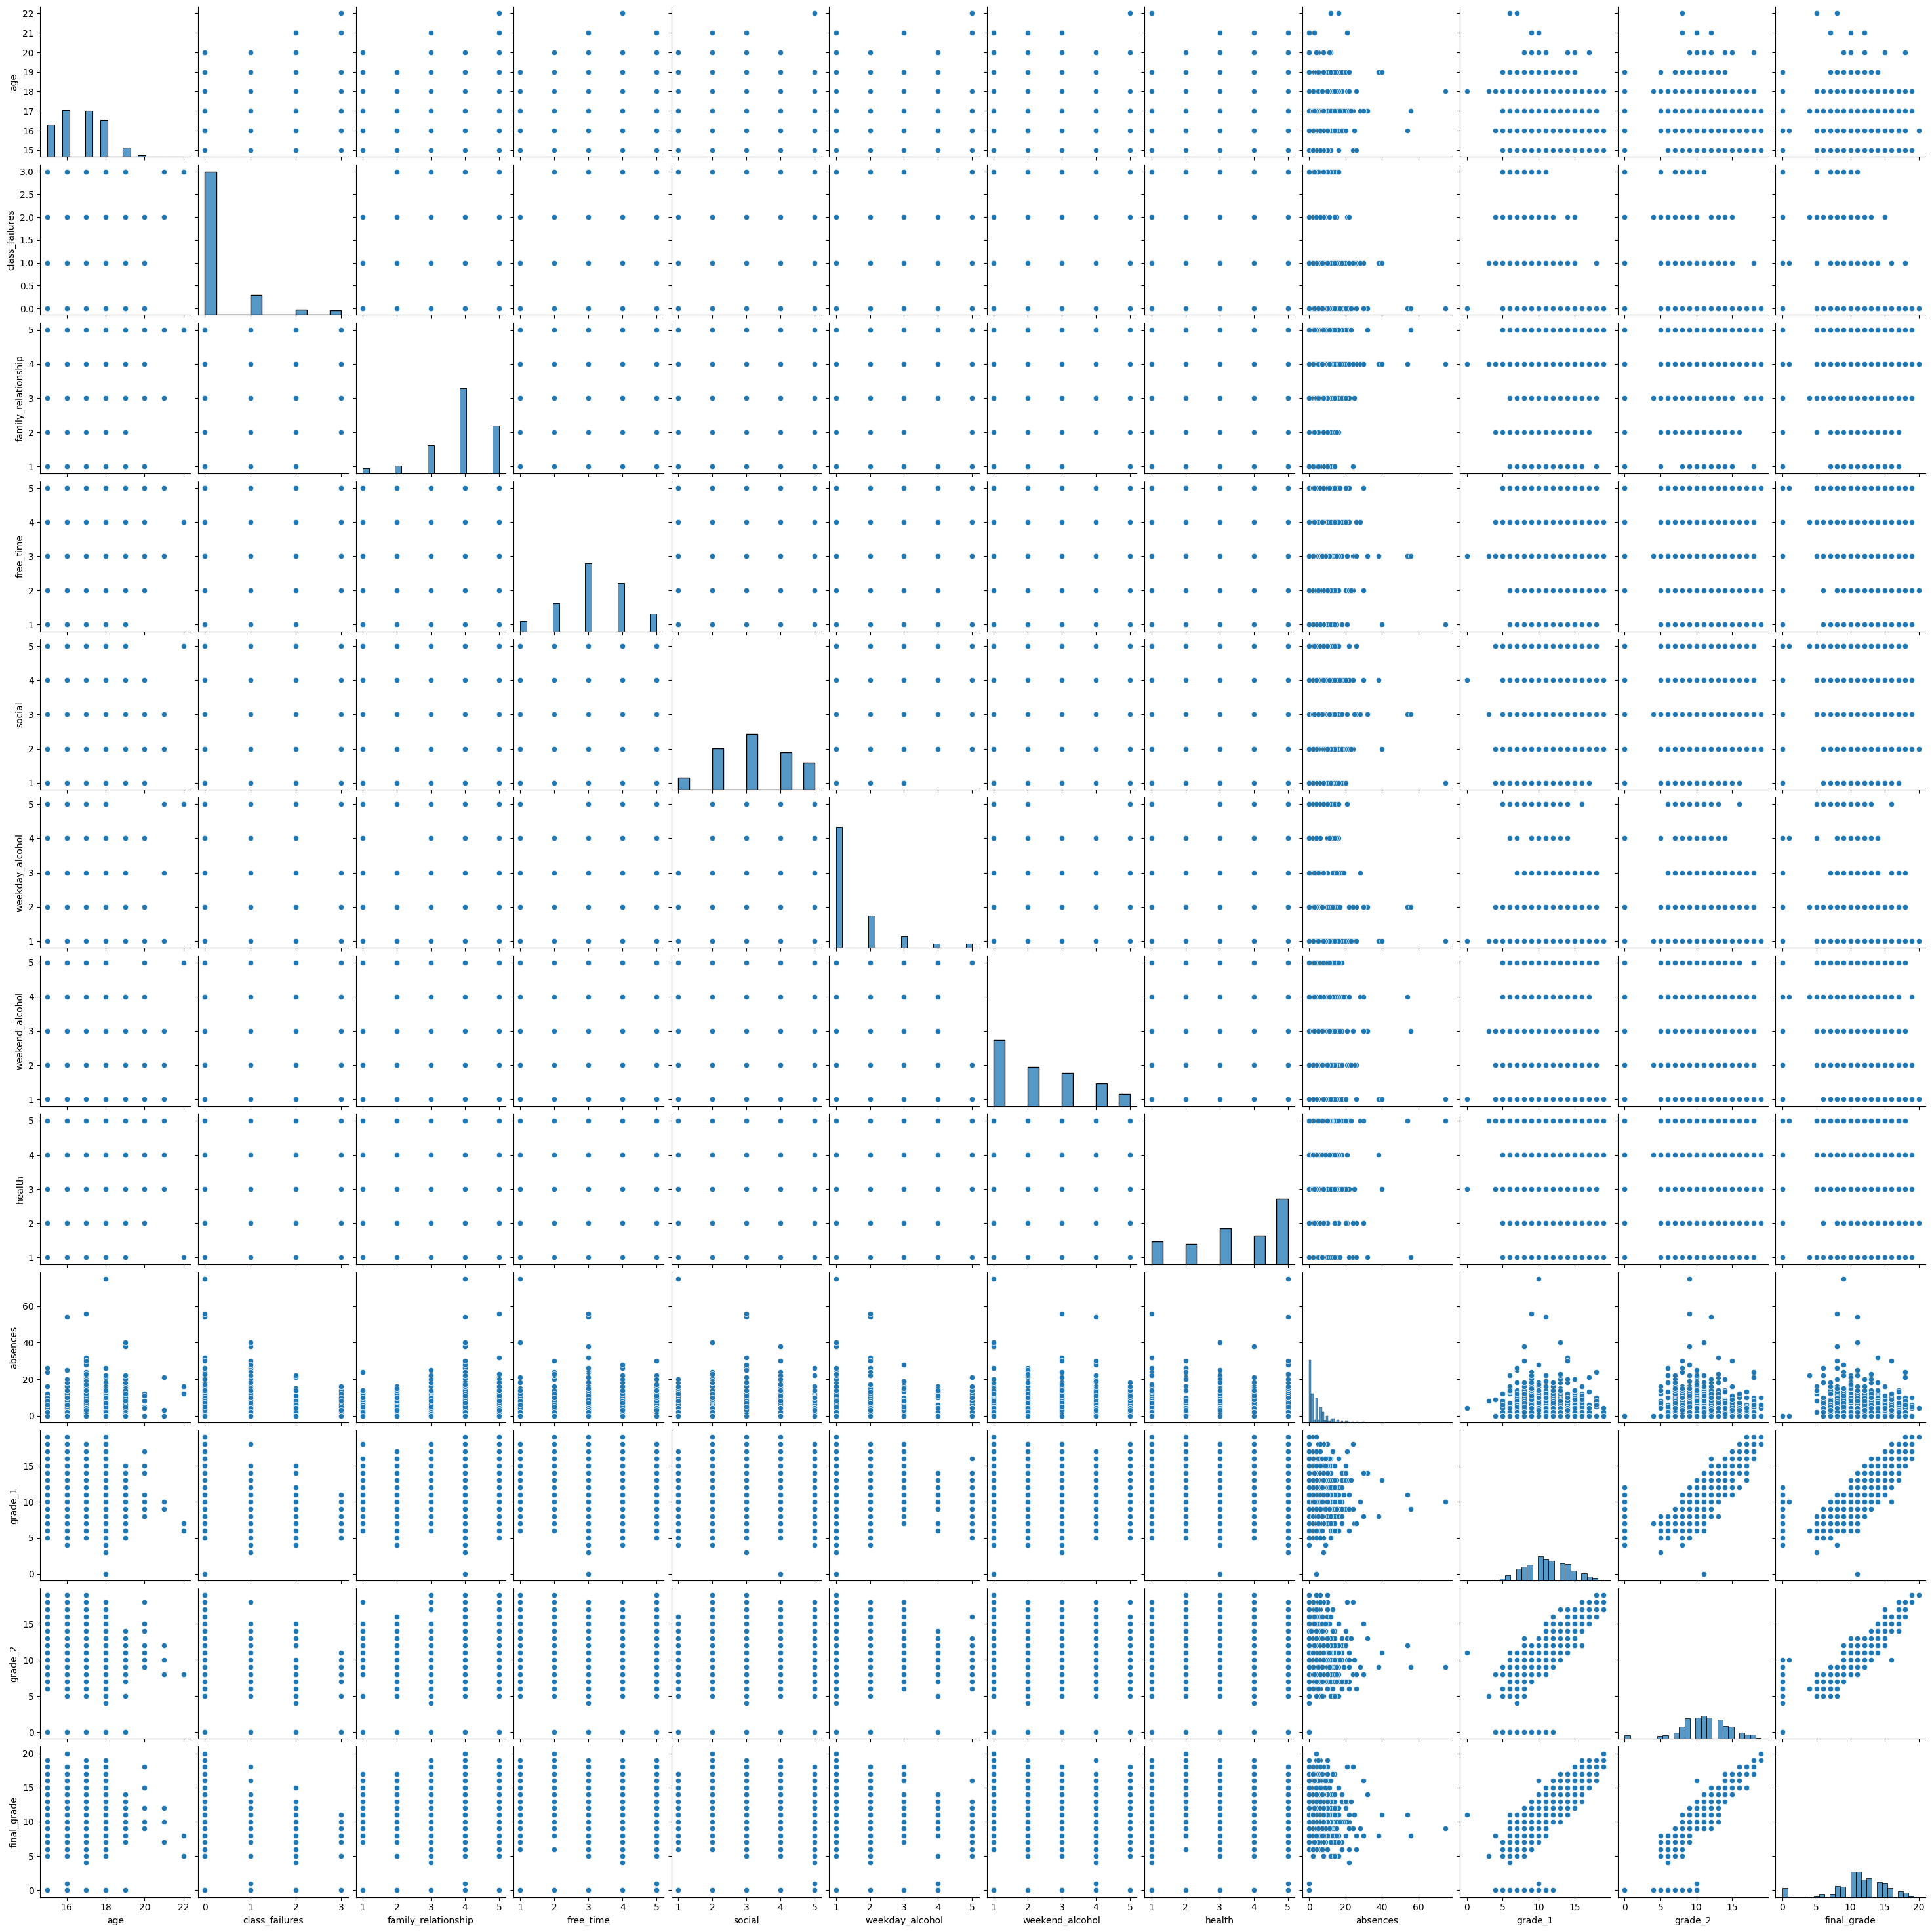

In [23]:
sns.pairplot(num_df)
plt.show()

### Univariate Analysis

#### Final Grade (`target`)

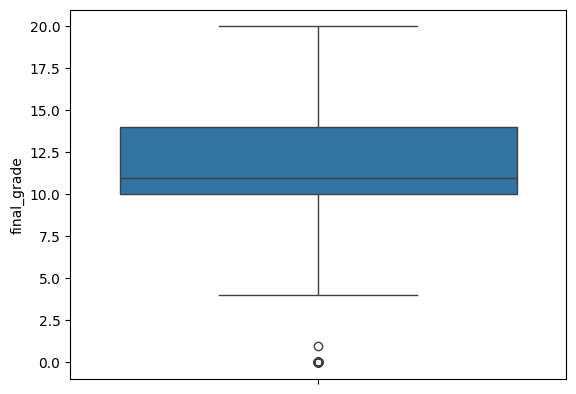

In [24]:
sns.boxplot(num_df["final_grade"])
plt.show()

In [25]:
num_df[num_df["final_grade"] <= 0].describe()

age  class_failures  family_relationship  free_time     social  \
count  53.000000       53.000000            53.000000  53.000000  53.000000   
mean   17.283019        0.886792             3.849057   3.245283   3.169811   
std     1.246184        1.012620             1.098885   0.958879   1.410617   
min    15.000000        0.000000             1.000000   1.000000   1.000000   
25%    16.000000        0.000000             3.000000   3.000000   2.000000   
50%    18.000000        1.000000             4.000000   3.000000   3.000000   
75%    18.000000        1.000000             5.000000   4.000000   4.000000   
max    19.000000        3.000000             5.000000   5.000000   5.000000   

       weekday_alcohol  weekend_alcohol     health  absences    grade_1  \
count        53.000000        53.000000  53.000000      53.0  53.000000   
mean          1.490566         2.132075   3.660377       0.0   7.396226   
std           0.799583         1.256334   1.300050       0.0   1.801064   
min           1.000000         1.000000   1.000000       0.0   4.000000   
25%           1.000000         1.000000   3.000000       0.0   6.000000   
50%           1.000000         2.000000   4.000000       0.0   7.000000   
75%           2.000000         3.000000   5.000000       0.0   8.000000   
max           4.000000         5.000000   5.000000       0.0  12.000000   

         grade_2  final_grade  
count  53.000000         53.0  
mean    4.415094          0.0  
std     3.707757          0.0  
min     0.000000          0.0  
25%     0.000000          0.0  
50%     5.000000          0.0  
75%     8.000000          0.0  
max    10.000000          0.0

## Categorical Features

### Brief description

In [26]:
cat_df.describe(include="object").T

count unique               top freq
sex                    1044      2                 F  591
address_type           1044      2             Urban  759
family_size            1044      2    Greater than 3  738
parent_status          1044      2   Living together  923
mother_education       1044      5  higher education  306
father_education       1044      5  5th to 9th grade  324
mother_job             1044      5             other  399
father_job             1044      5             other  584
school_choice_reason   1044      4            course  430
guardian               1044      3            mother  728
travel_time            1044      4          <15 min.  623
study_time             1044      4      2 to 5 hours  503
school_support         1044      2                no  925
family_support         1044      2               yes  640
extra_paid_classes     1044      2                no  824
activities             1044      2                no  528
nursery_school         1044      2               yes  835
higher_ed              1044      2               yes  955
internet_access        1044      2               yes  827
romantic_relationship  1044      2                no  673
math_intensive         1044      2                no  649

### Categories and mean scores

#### Getting the standard deviation of ***final_grade***

In [27]:
student_df["final_grade"].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: final_grade, dtype: float64

In [28]:
def mean_on_group(feature):
    return student_df.groupby(feature)["final_grade"].mean()

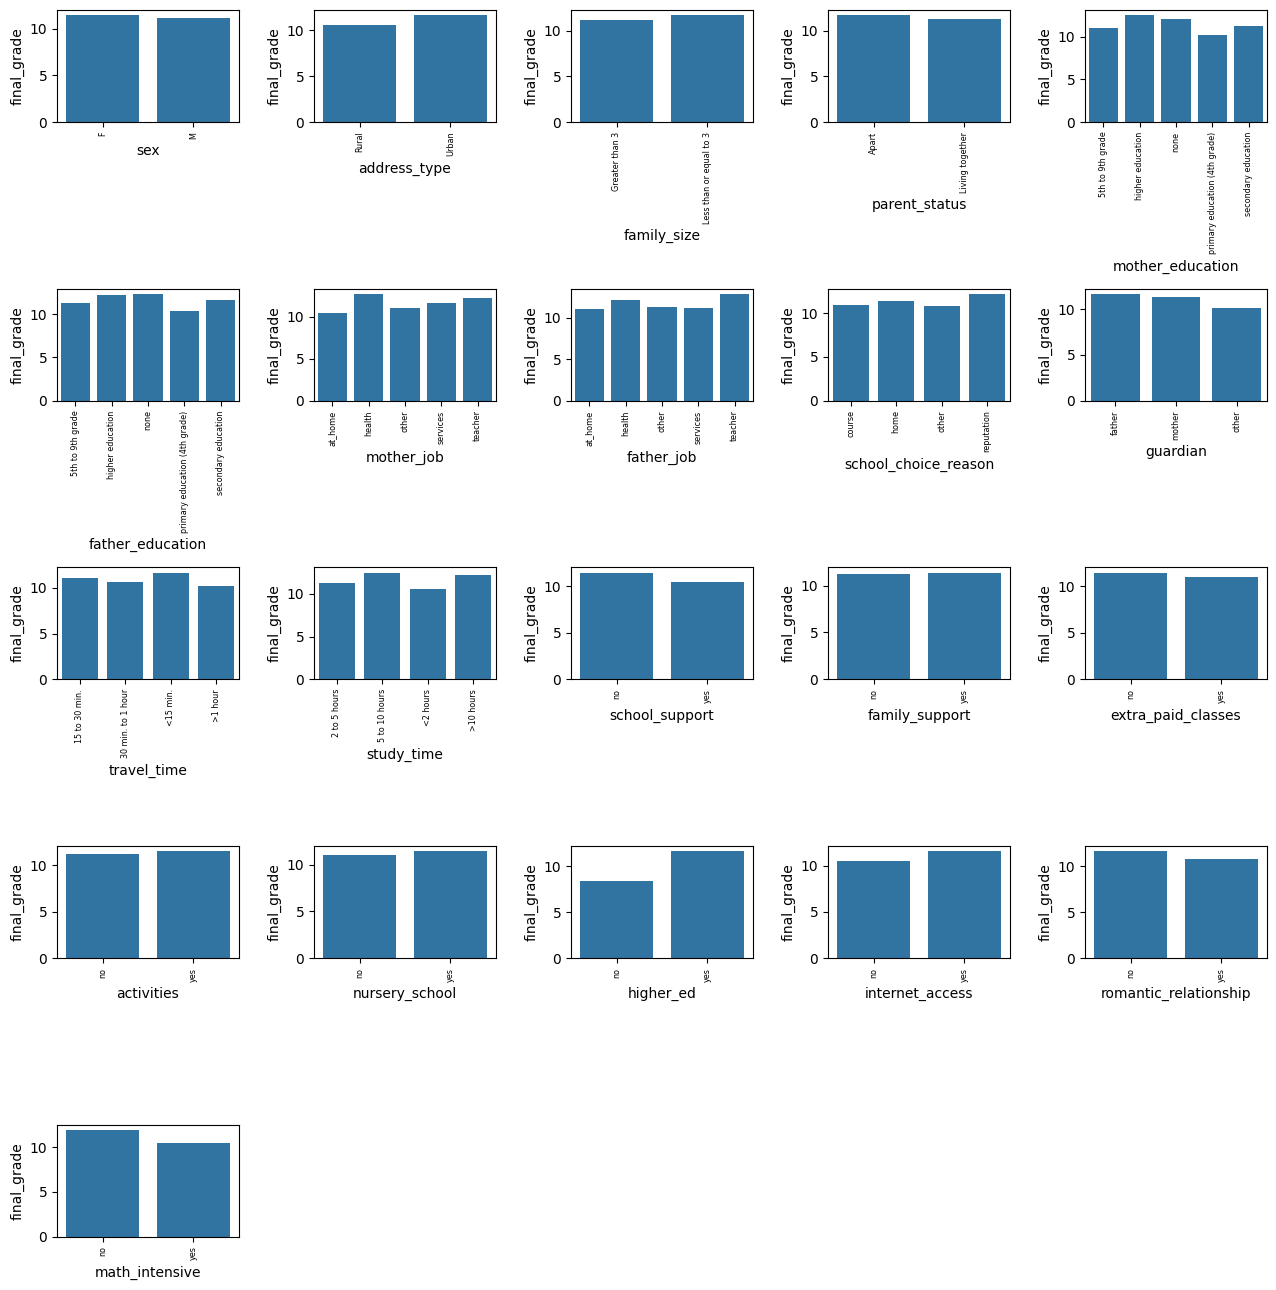

In [29]:
n = len(cat_df.columns)
fig, axes = plt.subplots(5,5, figsize=(13,13))
axes = axes.flatten()
for col, ax in zip(cat_df.columns, axes):
    sns.barplot(mean_on_group(col), ax=ax)


for i in range(len(axes)):
    ax = axes[i]
    if i >= len(cat_df.columns):
        ax.set_axis_off()
    else:
        ax.set_xticks(ax.get_xticks(), labels=ax.get_xticklabels(), rotation=90, fontsize="xx-small")

plt.tight_layout()
plt.show()

- <span style="color: slateblue">Students who want plan on taking <strong>higher_ed</strong> perform significantly better than those who don't plan to (difference in mean final grade is greater than 1 standard deviation)</span>
- <span style="color: slateblue">This could be due to the fact that majority wish to pursue higher education, hence inbalance<span/>

#### Bivariate analysis with `higher_ed` as hue

<Axes: xlabel='grade_1', ylabel='final_grade'>

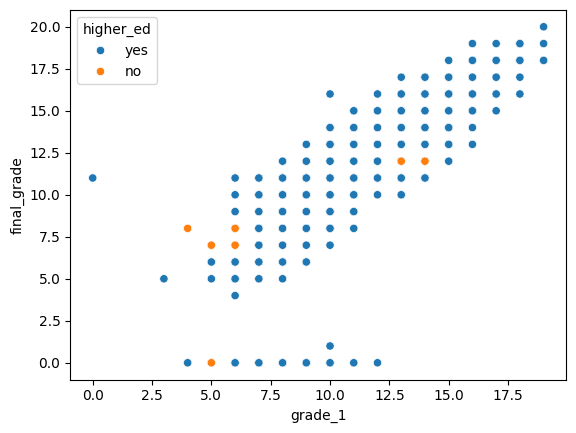

In [30]:
sns.scatterplot(data=student_df, x="grade_1", y="final_grade", hue="higher_ed")

<span style="color: slateblue">Reason for lower mean of student who do not wish to pursue higher ed might be due to single outlier</span>

In [31]:
cat_df[num_df["final_grade"] <= 0].describe(include="object").T.sort_values(by="freq", ascending=False)

count unique               top freq
school_support           53      2                no   51
parent_status            53      2   Living together   49
family_size              53      2    Greater than 3   44
extra_paid_classes       53      2                no   44
higher_ed                53      2               yes   42
nursery_school           53      2               yes   41
math_intensive           53      2               yes   38
internet_access          53      2               yes   38
guardian                 53      3            mother   36
address_type             53      2             Urban   33
sex                      53      2                 F   30
father_job               53      4             other   29
activities               53      2               yes   29
romantic_relationship    53      2               yes   29
family_support           53      2               yes   27
travel_time              53      4          <15 min.   26
school_choice_reason     53      4            course   24
study_time               53      4      2 to 5 hours   23
mother_job               53      5             other   22
father_education         53      4  5th to 9th grade   20
mother_education         53      4  5th to 9th grade   19

## Preparing for prediction

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Separating into predictors and target

In [33]:
drops = ["final_grade"]
X = student_df.drop(drops, axis=1)
y = student_df["final_grade"]

### `Preprocessing Pipeline`

In [34]:
## getting numerical and categorical features
numerical_features = num_df.drop(drops, axis=1).columns
categorical_features = cat_df.columns

## transformer for numeric features
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler())])

## transformer for categorical features
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])


## preprocessor)
preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features)
    ]
)

### Preprocessing

In [35]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'class_failures', 'family_relationship', 'free_time', 'social',
       'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_1',
       'grade_2'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index(['sex', 'address_type', 'family_size', 'parent_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_choice_reason', 'guardian', 'travel_time', 'study_time',
       'school_support', 'family_support', 'extra_paid_classes', 'activities',
       'nursery_school', 'higher_ed', 'internet_access',
       'romantic_relationship', 'math_intensive'],
      dtype='object'))])

In [36]:
X = preprocessor.transform(X)

## Training

In [33]:
## models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

## hyperparameter selection
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

## metrics
from sklearn.metrics import r2_score

### Splitting data into train and test

In [34]:
ts = 0.2
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

### Grid Search

In [35]:
## folds
kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [36]:
## function for grid_search
def grid_search(estimator, params, X, y, verbose=0):
    global kf
    grid = GridSearchCV(estimator, params, cv=kf, scoring="r2", verbose=verbose)
    grid.fit(X, y)

    print(f"Best score: {grid.best_score_}")
    print(f"Best parameters: {grid.best_params_}")

    return grid.best_score_, grid.best_params_, grid.best_estimator_

#### Decision Tree Regressor

In [41]:
params = {
    "max_depth": [2,4,6,8]
}

grid_search(DecisionTreeRegressor(), params, X_train, y_train)

Best score: 0.8333642648217895
Best parameters: {'max_depth': 4}


(0.8333642648217895, {'max_depth': 4}, DecisionTreeRegressor(max_depth=4))

#### SVR

In [49]:
params = {
    "C": [0.5, 1, 1.3]
}

grid_search(SVR(), params, X_train, y_train)

Best score: 0.7515412397893215
Best parameters: {'C': 1.3}


AttributeError: 'GridSearchCV' object has no attribute 'best_score'

#### Random Forest Regressor

In [52]:
params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [4,6,8, 10]
}

_, _, estimator = grid_search(RandomForestRegressor(), params, X_train, y_train, verbose=10)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV 1/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 1/7; 1/12] END max_depth=4, n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 2/7; 1/12] END max_depth=4, n_estimators=100;, score=0.838 total time=   0.3s
[CV 3/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 3/7; 1/12] END max_depth=4, n_estimators=100;, score=0.916 total time=   0.3s
[CV 4/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 4/7; 1/12] END max_depth=4, n_estimators=100;, score=0.816 total time=   0.3s
[CV 5/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 5/7; 1/12] END max_depth=4, n_estimators=100;, score=0.849 total time=   0.5s
[CV 6/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 6/7; 1/12] END max_depth=4, n_estimator

#### Gradient Boosting Regressor

In [124]:
params = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3, 1]
}

grid_search(GradientBoostingRegressor(), params, X_train, y_train, verbose=10)

Fitting 7 folds for each of 36 candidates, totalling 252 fits
[CV 1/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 1/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.325 total time=   0.9s
[CV 2/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 2/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.422 total time=   0.8s
[CV 3/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 3/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.252 total time=   1.0s
[CV 4/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 4/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.263 total time=   1.0s
[CV 5/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 5/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.406 total time=   0.9s
[CV 6/7; 1/36] START learnin

GradientBoostingRegressor(max_depth=2, n_estimators=300)

#### LGBMRegressor

In [67]:
params = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3, 1]
}

bs, bp, _ = grid_search(LGBMRegressor(verbose=0), params, X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [69]:
# bp

NameError: name 'bp' is not defined

### Training Models

#### Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
print(r2_score(lr.predict(X_test), y_test))

-1.5003242132110124


## Model interpretation

In [37]:
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay
import lime.lime_tabular

### Fitting selected model

In [38]:
estimator = RandomForestRegressor(**{'max_depth': 4, 'n_estimators': 300})
estimator.fit(X_train, y_train)

NameError: name 'RandomForestRegressor' is not defined

### Checking performance of model on testing data

In [ ]:
print(r2_score(y_test, estimator.predict(X_test)))

### Getting feature importances

In [ ]:
feature_importances = permutation_importance(estimator=estimator, X=X_train, y=y_train, n_repeats=10, random_state=42)

In [ ]:
## sorting from most important to least important
sorted_idxs = feature_importances.importances_mean.argsort()

#### Getting top features

In [ ]:
top_idxs = sorted_idxs[-12:][::-1]
top_features = preprocessor.get_feature_names_out()[top_idxs]
top_scores = feature_importances.importances_mean[top_idxs]

In [ ]:
## displaying top 10 features
plt.bar(top_features, top_scores, log=True, animated=True)

## presets
plt.xticks(rotation=90, fontsize=8)
csfont = {'fontname':'Comic Sans MS'}
label_font = {"fontname": "cursive", "fontsize": 10}
plt.title(f"Mean importances for top {len(top_features)} features (log scale)",**csfont)


plt.xlabel('Feature Names', **label_font)
plt.ylabel("Mean Importance", **label_font)

plt.show()

#### Partial dependence for top features

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

PartialDependenceDisplay.from_estimator(
    estimator=estimator,
    X=X_train.T,
    features=top_idxs[:4],
    categorical_features=[top_idxs[1]],
    random_state=42,
    feature_names = preprocessor.get_feature_names_out(),
    n_cols=4,
    ax=axes
)

plt.tight_layout()
plt.show()

In [ ]:
top_features

### Surrogate (Linear Regression)

In [ ]:
## get black box predictions
y_blackbox = estimator.predict(X_test)

## train surrogate
surrogate = Ridge(max_iter=10000, alpha=0.5)
surrogate.fit(X_test, y_blackbox)

In [ ]:
## check performance
r2_score(y_blackbox, surrogate.predict(X_test))

In [ ]:
surrogate.coef_

In [ ]:
# fig = plt.figure(figsize=(12,12))
plt.barh(preprocessor.get_feature_names_out()[top_idxs],surrogate.coef_[top_idxs])

### **LIME** for random test sample

#### Creating explainer

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test,
    mode="regression",
    feature_names=preprocessor.get_feature_names_out(),
    random_state=42,
    verbose=True
)

In [ ]:
instance_idx = np.random.randint(X_test.shape[0])
selected_instance = X_test[instance_idx]
pd.DataFrame(data=selected_instance.reshape(1,-1), columns=preprocessor.get_feature_names_out())[top_features]

In [ ]:
estimator.predict(selected_instance.reshape(1,-1))

In [ ]:
exp = explainer.explain_instance(selected_instance,
                                 estimator.predict,
                                 num_features=len(top_features)
                                )

exp.as_pyplot_figure()
plt.show()

# USE UNSEEN DATA AS `DATA FOR APP`